# **GitHub**

In [95]:
from google.colab import auth
auth.authenticate_user()

# Konfigurasi identitas GitHub
!git config --global user.email "satriadivop354@gmail.com"
!git config --global user.name "SatriaDivo"

# Clone repository dengan URL yang benar
!git clone https://@github.com/IET-Polinela/supervised-learning-SatriaDivo

# Masuk ke direktori repository
%cd supervised-learning-SatriaDivo

Cloning into 'supervised-learning-SatriaDivo'...
/content/supervised-learning-SatriaDivo/supervised-learning-SatriaDivo


# **1. Data Understanding**

In [ ]:
# %%writefile data_understanding.py
import pandas as pd

# Load dataset
file_path = "HousePricing.csv"
df = pd.read_csv(file_path)

# Menghitung statistik deskriptif untuk semua fitur numerik
numeric_df = df.select_dtypes(include=["number"])
stats = numeric_df.describe().T
stats["median"] = numeric_df.median()

# Menampilkan statistik yang diminta
stats = stats[["count", "mean", "median", "std", "min", "25%", "50%", "75%", "max"]]
print("Statistik Deskriptif:\n", stats)

# Menampilkan jumlah nilai yang hilang per kolom
missing_values = df.isnull().sum()
print("\nJumlah Nilai yang Hilang:\n", missing_values[missing_values > 0])

# Mengisi nilai yang hilang pada kolom numerik dengan median
for col in numeric_df.columns:
    df[col].fillna(df[col].median(), inplace=True)

print("\nNilai yang hilang pada kolom numerik telah diisi dengan median.")

# Menampilkan kembali jumlah nilai yang hilang setelah imputasi
missing_values_after = df.isnull().sum()
print("\nJumlah Nilai yang Hilang Setelah Imputasi:\n", missing_values_after[missing_values_after > 0])


Statistik Deskriptif:
                 count           mean    median           std      min  \
Id             1460.0     730.500000     730.5    421.610009      1.0   
MSSubClass     1460.0      56.897260      50.0     42.300571     20.0   
LotFrontage    1201.0      70.049958      69.0     24.284752     21.0   
LotArea        1460.0   10516.828082    9478.5   9981.264932   1300.0   
OverallQual    1460.0       6.099315       6.0      1.382997      1.0   
OverallCond    1460.0       5.575342       5.0      1.112799      1.0   
YearBuilt      1460.0    1971.267808    1973.0     30.202904   1872.0   
YearRemodAdd   1460.0    1984.865753    1994.0     20.645407   1950.0   
MasVnrArea     1452.0     103.685262       0.0    181.066207      0.0   
BsmtFinSF1     1460.0     443.639726     383.5    456.098091      0.0   
BsmtFinSF2     1460.0      46.549315       0.0    161.319273      0.0   
BsmtUnfSF      1460.0     567.240411     477.5    441.866955      0.0   
TotalBsmtSF    1460.0    105

<ipython-input-8-67516cb61181>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


# **2. Data Preprocessing**

In [ ]:
# %%writefile data_preprocessing.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "HousePricing.csv"
df = pd.read_csv(file_path)

# Mengidentifikasi kolom nonnumerik
non_numeric_cols = df.select_dtypes(exclude=["number"]).columns

# Menerapkan encoding untuk fitur-fitur nonnumerik
encoder = LabelEncoder()

for col in non_numeric_cols:
    df[col] = encoder.fit_transform(df[col])

# Menentukan fitur independen (X) dan target/label (Y)
# Misalkan target/label adalah 'SalePrice' (sesuaikan dengan kolom target yang ada pada dataset Anda)
X = df.drop(columns=["SalePrice"])
Y = df["SalePrice"]

# Membagi dataset menjadi training data dan testing data (80:20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data preprocessing selesai.")
print(f"Dimensi training data: X_train={X_train.shape}, Y_train={Y_train.shape}")
print(f"Dimensi testing data: X_test={X_test.shape}, Y_test={Y_test.shape}")

Data preprocessing selesai.
Dimensi training data: X_train=(1168, 80), Y_train=(1168,)
Dimensi testing data: X_test=(292, 80), Y_test=(292,)


# **3. Outlier Handling**

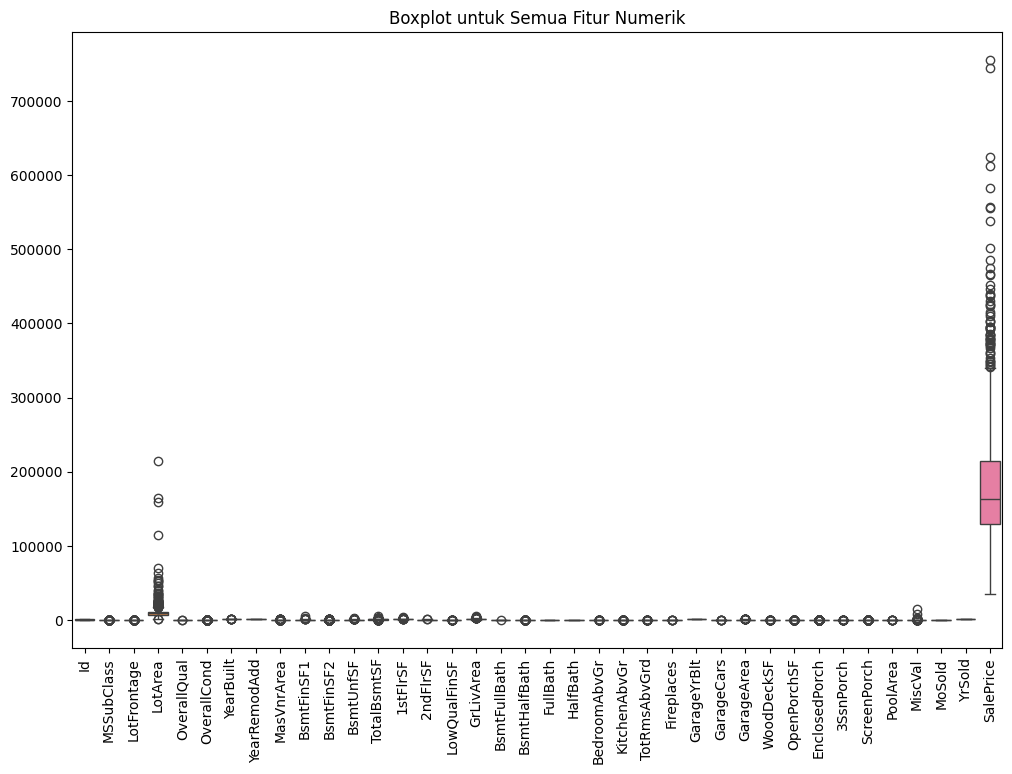

Jumlah baris dengan outlier berdasarkan Z-Score: 0


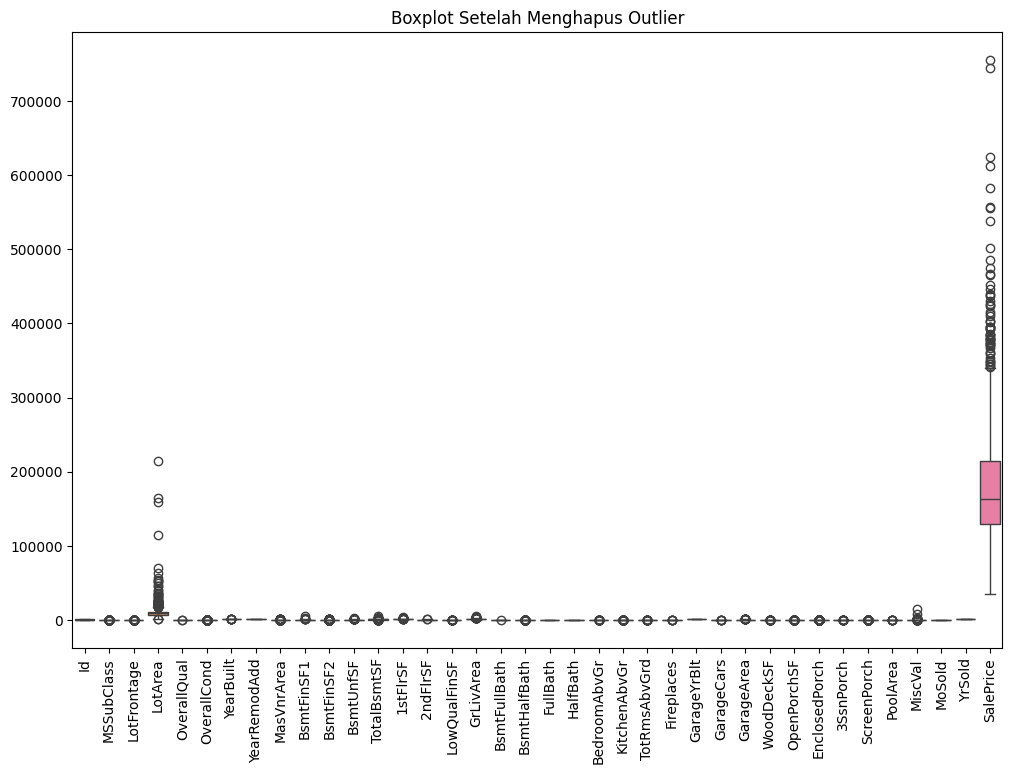

Dataset dengan outlier telah dihapus dan disimpan sebagai 'HousePricing_no_outliers.csv'.


In [ ]:
# %%writefile outlier_handling.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
file_path = "HousePricing.csv"
df = pd.read_csv(file_path)

# Menampilkan boxplot untuk setiap fitur numerik untuk visualisasi outlier
numeric_df = df.select_dtypes(include=["number"])

# Membuat boxplot untuk semua fitur numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.title('Boxplot untuk Semua Fitur Numerik')
plt.show()

# Mengidentifikasi outlier menggunakan Z-Score
z_scores = np.abs(stats.zscore(numeric_df))
outliers_zscore = (z_scores > 3).all(axis=1)

# Menampilkan jumlah data dengan outlier (menggunakan Z-Score)
print(f"Jumlah baris dengan outlier berdasarkan Z-Score: {sum(outliers_zscore)}")

# Menghapus outlier (menggunakan Z-Score)
df_no_outliers = df[~outliers_zscore]

# Visualisasi boxplot setelah menghapus outlier
numeric_df_no_outliers = df_no_outliers.select_dtypes(include=["number"])
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df_no_outliers)
plt.xticks(rotation=90)
plt.title('Boxplot Setelah Menghapus Outlier')
plt.show()

# Menyimpan dataset dengan dan tanpa outlier
df_no_outliers.to_csv("HousePricing_no_outliers.csv", index=False)

print("Dataset dengan outlier telah dihapus dan disimpan sebagai 'HousePricing_no_outliers.csv'.")

# **4. Feature Scaling**

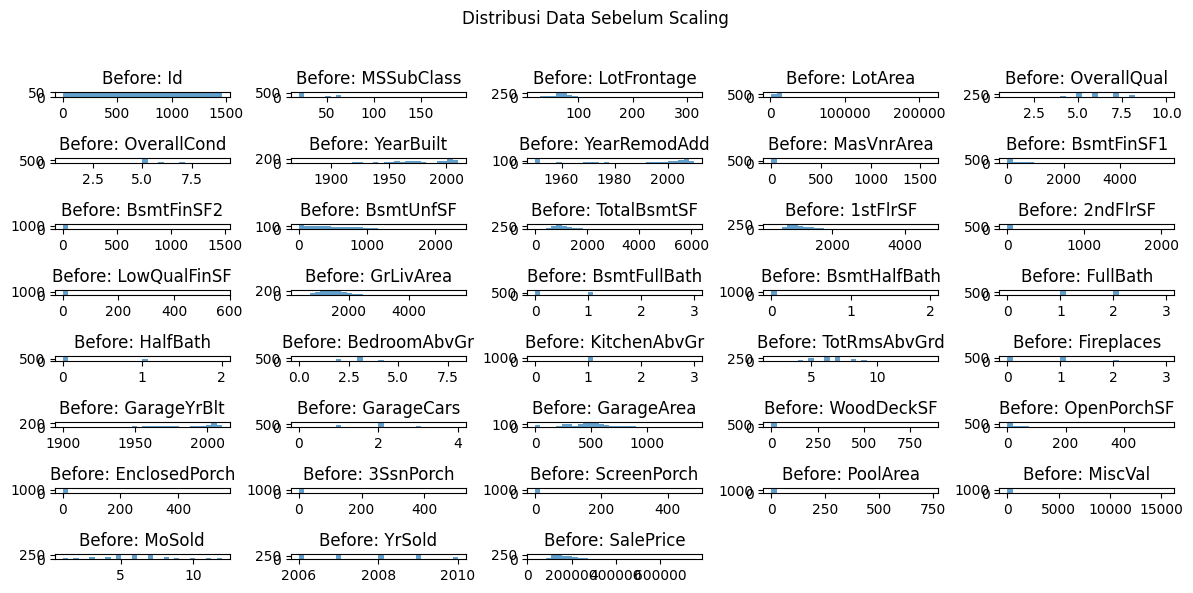

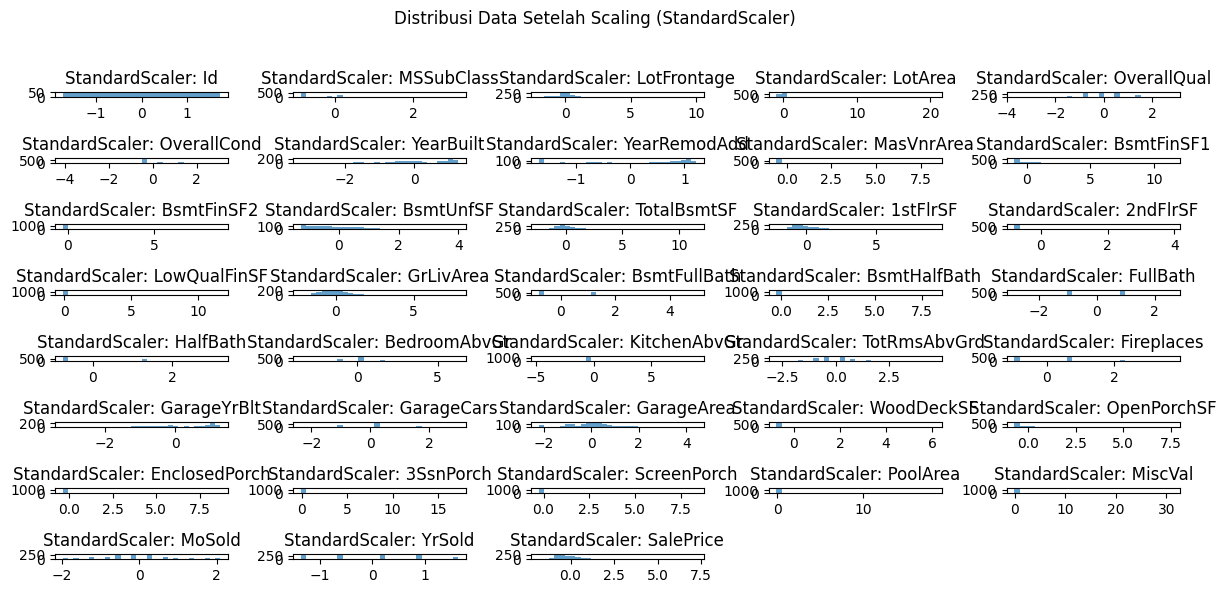

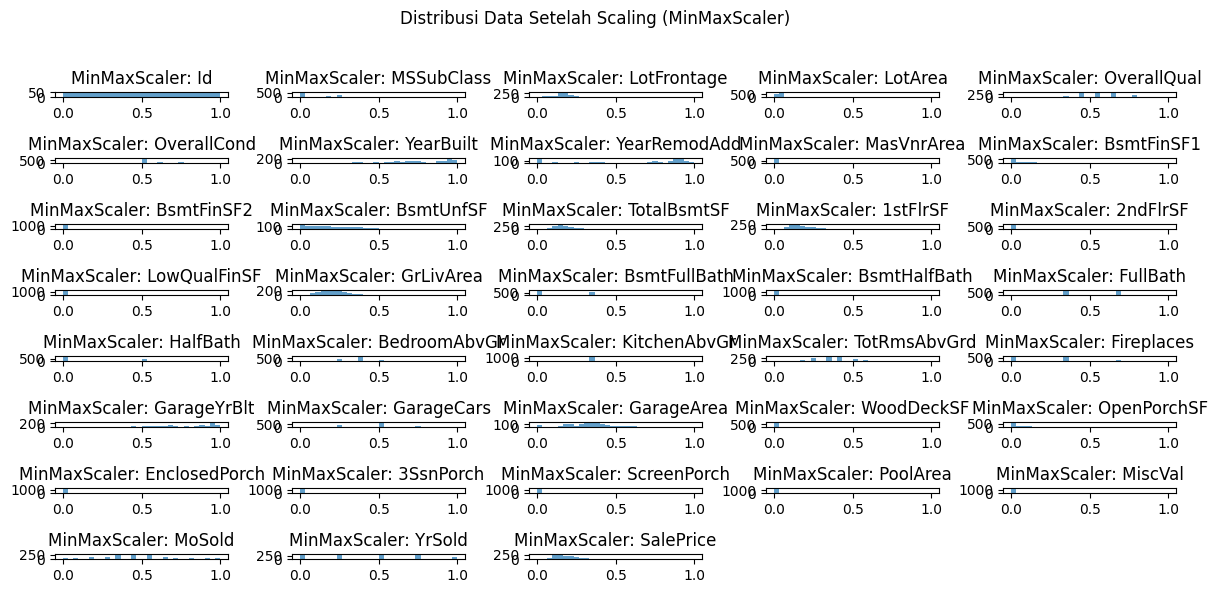

Data Setelah StandardScaler:
          Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.208034 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.409895 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084449  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.414011 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.574676  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0   1.050994      0.878668    0.510015    0.575425  ...   -0.752176   
1   0.156734     -0.429577   -0.572835    1.171992  ...    1.626195   
2   0.984752      0.830215    0.322174    0.092907  ...   -0.752176   
3  -1.863632     -0.720298   -0.572835   -0.499274  ...   -0.752176   
4   0.951632      0.733308    1.360826    0.463568  ...    0.780197   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
0     0.2

In [ ]:
# %%writefile feature_scaling.py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Membaca dataset yang sudah dibersihkan dari outlier
file_path = "HousePricing_no_outliers.csv"  # Gantilah dengan path yang sesuai
df_no_outliers = pd.read_csv(file_path)

# Memilih fitur numerik
numeric_df = df_no_outliers.select_dtypes(include=["number"])

# Sebelum scaling: Visualisasi histogram dari data asli
plt.figure(figsize=(12, 6))
plt.suptitle("Distribusi Data Sebelum Scaling")

# Menyesuaikan jumlah subplot berdasarkan jumlah fitur
num_features = len(numeric_df.columns)
ncols = 5  # Menentukan jumlah kolom
nrows = (num_features // ncols) + 1  # Menentukan jumlah baris berdasarkan jumlah fitur

for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(nrows, ncols, i)
    plt.hist(numeric_df[column], bins=30, alpha=0.7)
    plt.title(f"Before: {column}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# StandardScaler
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(numeric_df)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(numeric_df)

# Menyusun dataframe untuk data yang telah discaling
scaled_standard_df = pd.DataFrame(scaled_standard, columns=numeric_df.columns)
scaled_minmax_df = pd.DataFrame(scaled_minmax, columns=numeric_df.columns)

# Setelah scaling: Visualisasi histogram untuk data setelah scaling

plt.figure(figsize=(12, 6))
plt.suptitle("Distribusi Data Setelah Scaling (StandardScaler)")

# StandardScaler
for i, column in enumerate(scaled_standard_df.columns, 1):
    plt.subplot(nrows, ncols, i)
    plt.hist(scaled_standard_df[column], bins=30, alpha=0.7)
    plt.title(f"StandardScaler: {column}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

plt.figure(figsize=(12, 6))
plt.suptitle("Distribusi Data Setelah Scaling (MinMaxScaler)")

# MinMaxScaler
for i, column in enumerate(scaled_minmax_df.columns, 1):
    plt.subplot(nrows, ncols, i)
    plt.hist(scaled_minmax_df[column], bins=30, alpha=0.7)
    plt.title(f"MinMaxScaler: {column}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Output dataframe yang sudah discaling
print("Data Setelah StandardScaler:\n", scaled_standard_df.head())
print("\nData Setelah MinMaxScaler:\n", scaled_minmax_df.head())

# **5. Implementation: Linear Regression**

In [ ]:
# %%writefile linear_regression.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# === 1. Load Dataset ===
df_outliers = pd.read_csv("HousePricing.csv")  # Dataset dengan outlier
df_clean = pd.read_csv("HousePricing_no_outliers.csv")  # Dataset tanpa outlier

# === 2. Memisahkan Fitur (X) dan Target (y) ===
X_outliers = df_outliers.drop(columns=["SalePrice"])
y_outliers = df_outliers["SalePrice"]

X_clean = df_clean.drop(columns=["SalePrice"])
y_clean = df_clean["SalePrice"]

# === 3. Mengubah Data Kategorikal ke Numerik ===
X_outliers = pd.get_dummies(X_outliers, drop_first=True)
X_clean = pd.get_dummies(X_clean, drop_first=True)

# Pastikan kedua dataset memiliki kolom yang sama setelah encoding
X_outliers, X_clean = X_outliers.align(X_clean, join='left', axis=1, fill_value=0)

# === 4. Membagi Data Menjadi Training dan Testing Set ===
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=42)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# === 5. Scaling Data (StandardScaler) untuk dataset tanpa outlier ===
X_train_clean = X_train_clean.fillna(X_train_clean.mean()) # or X_train_clean.fillna(0)
X_test_clean = X_test_clean.fillna(X_test_clean.mean())  # or X_test_clean.fillna(0)

scaler = StandardScaler()
X_train_clean_scaled = scaler.fit_transform(X_train_clean)
X_test_clean_scaled = scaler.transform(X_test_clean)

# === Impute NaN values in X_train_out (Replace NaN with 0) ===
X_train_out = X_train_out.fillna(0)  # or X_train_out.fillna(X_train_out.mean(), inplace=True)
X_test_out = X_test_out.fillna(0)    # or X_test_out.fillna(X_test_out.mean(), inplace=True)


# === 6. Model Linear Regression ===
model_out = LinearRegression()
model_clean = LinearRegression()

# Melatih Model
model_out.fit(X_train_out, y_train_out)  # Dengan outlier
model_clean.fit(X_train_clean_scaled, y_train_clean)  # Tanpa outlier (scaling diterapkan)

# === 7. Prediksi ===
y_pred_out = model_out.predict(X_test_out)  # Prediksi dengan outlier
y_pred_clean = model_clean.predict(X_test_clean_scaled)  # Prediksi tanpa outlier

# === 8. Evaluasi Model ===
mse_out = mean_squared_error(y_test_out, y_pred_out)
r2_out = r2_score(y_test_out, y_pred_out)

mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

print(f"Model dengan Outlier - MSE: {mse_out:.2f}, R² Score: {r2_out:.2f}")
print(f"Model tanpa Outlier - MSE: {mse_clean:.2f}, R² Score: {r2_clean:.2f}")

# === 9. Visualisasi Scatter Plot Prediksi vs Aktual ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Scatter Plot: Actual vs Predicted")

# Dengan Outlier
sns.scatterplot(x=y_test_out, y=y_pred_out, alpha=0.6, ax=axes[0])
axes[0].plot([y_test_out.min(), y_test_out.max()], [y_test_out.min(), y_test_out.max()], color="red", linestyle="--")
axes[0].set_title("Dengan Outlier")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# Tanpa Outlier
sns.scatterplot(x=y_test_clean, y=y_pred_clean, alpha=0.6, ax=axes[1])
axes[1].plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], color="red", linestyle="--")
axes[1].set_title("Tanpa Outlier (Scaling)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

plt.show()

# === 10. Residual Plot ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Residual Plot")

# Dengan Outlier
residuals_out = y_test_out - y_pred_out
sns.scatterplot(x=y_pred_out, y=residuals_out, alpha=0.6, ax=axes[0])
axes[0].axhline(y=0, color="red", linestyle="--")
axes[0].set_title("Dengan Outlier")
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")

# Tanpa Outlier
residuals_clean = y_test_clean - y_pred_clean
sns.scatterplot(x=y_pred_clean, y=residuals_clean, alpha=0.6, ax=axes[1])
axes[1].axhline(y=0, color="red", linestyle="--")
axes[1].set_title("Tanpa Outlier (Scaling)")
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Residuals")

plt.show()

# === 11. Distribusi Residual ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Distribusi Residual")

# Dengan Outlier
sns.histplot(residuals_out, bins=30, kde=True, ax=axes[0])
axes[0].axvline(x=0, color="red", linestyle="--")
axes[0].set_title("Dengan Outlier")
axes[0].set_xlabel("Residuals")

# Tanpa Outlier
sns.histplot(residuals_clean, bins=30, kde=True, ax=axes[1])
axes[1].axvline(x=0, color="red", linestyle="--")
axes[1].set_title("Tanpa Outlier (Scaling)")
axes[1].set_xlabel("Residuals")

plt.show()

Overwriting linear_regression.py


# **6. Implementation: Polynomial Regression**

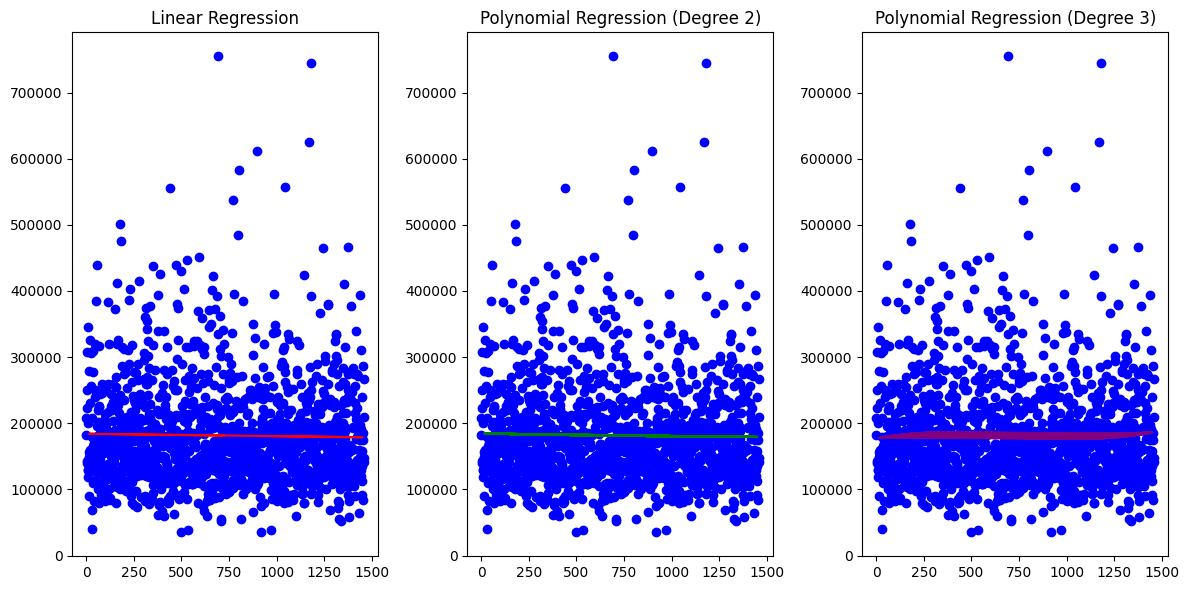

Linear Regression - MSE: 7671441339.934926, R2: -0.00014538270181474466
Polynomial Regression (Degree 2) - MSE: 7673256012.837747, R2: -0.00038196623865571766
Polynomial Regression (Degree 3) - MSE: 7685831610.806454, R2: -0.002021479034985507


In [ ]:
# %%writefile polynomial_regression.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Path to your dataset file
file_path = 'HousePricing_no_outliers.csv'

# Load the dataset
data = pd.read_csv(file_path)

X = data[['Id']]
y = data['SalePrice']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predicting with Linear Regression
y_pred_linear = linear_regressor.predict(X_test)

# Calculate MSE and R2 for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# 2. Polynomial Regression (Degree 2)
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X_train)

poly2_regressor = LinearRegression()
poly2_regressor.fit(X_poly2, y_train)

# Predicting with Polynomial Regression (Degree 2)
X_test_poly2 = poly2.transform(X_test)
y_pred_poly2 = poly2_regressor.predict(X_test_poly2)

# Calculate MSE and R2 for Polynomial Regression (Degree 2)
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)

# 3. Polynomial Regression (Degree 3)
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X_train)

poly3_regressor = LinearRegression()
poly3_regressor.fit(X_poly3, y_train)

# Predicting with Polynomial Regression (Degree 3)
X_test_poly3 = poly3.transform(X_test)
y_pred_poly3 = poly3_regressor.predict(X_test_poly3)

# Calculate MSE and R2 for Polynomial Regression (Degree 3)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)

# 4. Visualizations
plt.figure(figsize=(12, 6))

# Plotting Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred_linear, color='red')
plt.title('Linear Regression')

# Plotting Polynomial Regression (Degree 2)
plt.subplot(1, 3, 2)
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred_poly2, color='green')
plt.title('Polynomial Regression (Degree 2)')

# Plotting Polynomial Regression (Degree 3)
plt.subplot(1, 3, 3)
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred_poly3, color='purple')
plt.title('Polynomial Regression (Degree 3)')

plt.tight_layout()
plt.show()

# Output the evaluation results
print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}")
print(f"Polynomial Regression (Degree 2) - MSE: {mse_poly2}, R2: {r2_poly2}")
print(f"Polynomial Regression (Degree 3) - MSE: {mse_poly3}, R2: {r2_poly3}")

# **7. Implementation: KNN Regression**

KNN Regression (K = 3):
MSE: 1876271892.7895737
R²: 0.7553856456546137
----------------------------------------
KNN Regression (K = 5):
MSE: 1910108814.8095887
R²: 0.750974239789201
----------------------------------------
KNN Regression (K = 7):
MSE: 1947444750.5705898
R²: 0.7461066585739435
----------------------------------------


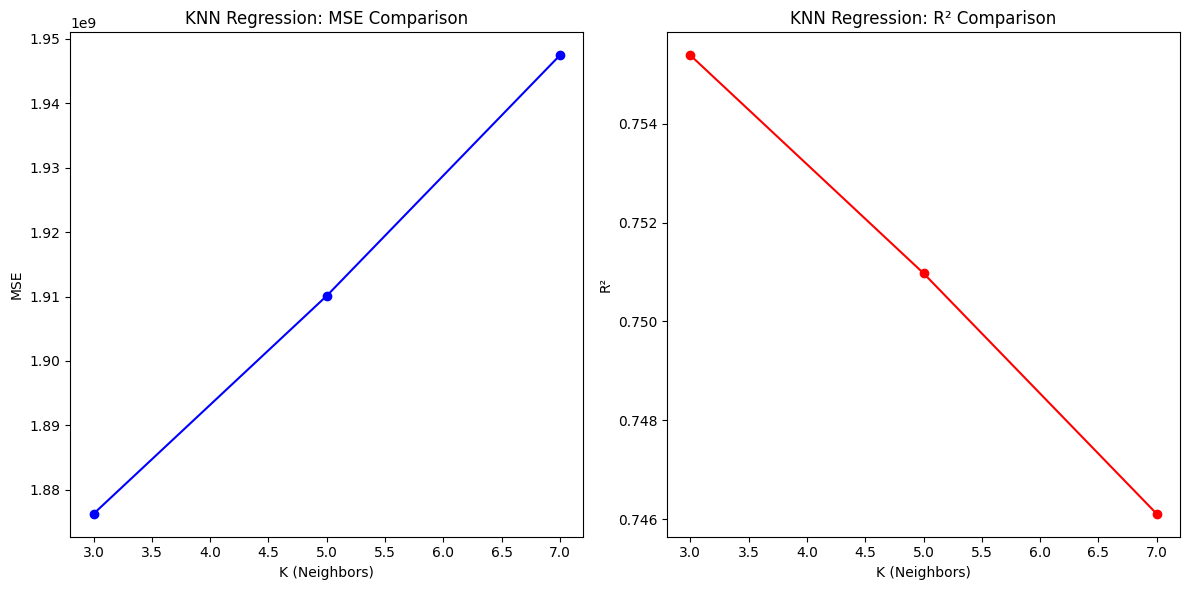

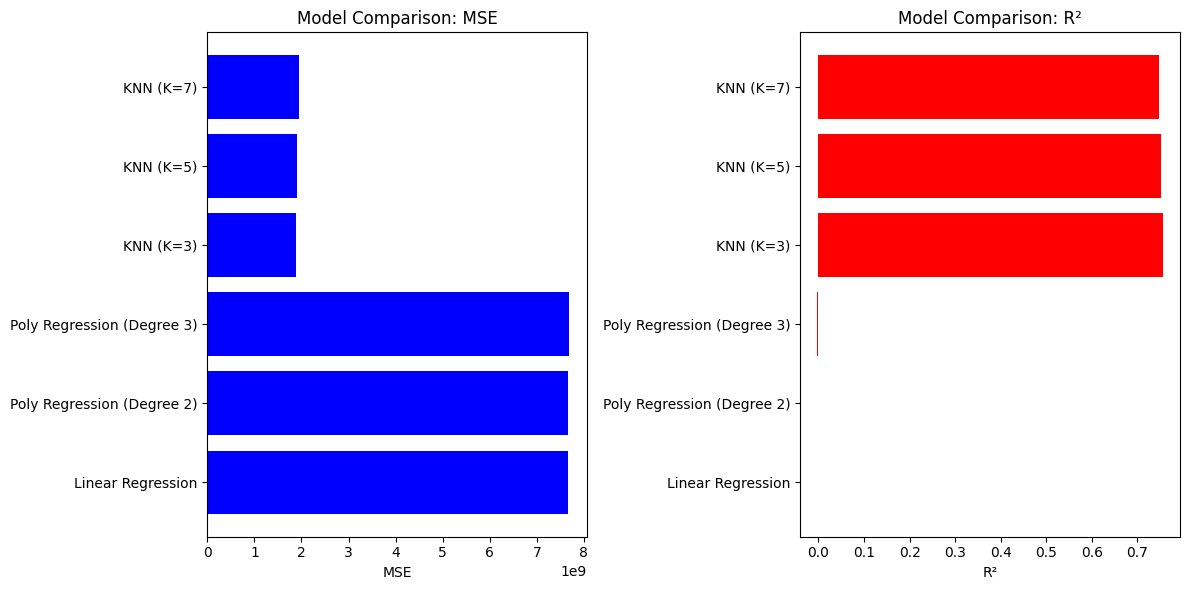

In [ ]:
# %%writefile knn_regression.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Path to your dataset file
file_path = 'HousePricing_no_outliers.csv'

# Load the dataset
data = pd.read_csv(file_path)

# ---->  Convert categorical features to numerical using OneHotEncoder:
categorical_features = data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array
encoded_data = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features
numerical_features = data.select_dtypes(exclude=['object']).columns
final_data = pd.concat([data[numerical_features], encoded_df], axis=1)


# Split the dataset into features (X) and target (y)
X = final_data.drop(['SalePrice', 'Id'], axis=1)  # Features (Exclude 'SalePrice' and 'Id') # Update this line
y = final_data['SalePrice']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation to handle NaN values before scaling
imputer = SimpleImputer(strategy='mean') # or strategy='median', 'most_frequent', 'constant'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Feature Scaling (Standardization) for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Regression with K = 3, 5, and 7
k_values = [3, 5, 7]
results = {}

for k in k_values:
    # Initialize the KNN regressor
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate MSE and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[k] = {'MSE': mse, 'R²': r2}

    # Print the results
    print(f"KNN Regression (K = {k}):")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")
    print("-" * 40)

# Visualize comparison of MSE and R² for KNN with K=3,5,7
k_values_list = list(results.keys())
mse_values = [results[k]['MSE'] for k in k_values_list]
r2_values = [results[k]['R²'] for k in k_values_list]

plt.figure(figsize=(12, 6))

# Plotting MSE for KNN
plt.subplot(1, 2, 1)
plt.plot(k_values_list, mse_values, marker='o', linestyle='-', color='b')
plt.title('KNN Regression: MSE Comparison')
plt.xlabel('K (Neighbors)')
plt.ylabel('MSE')

# Plotting R² for KNN
plt.subplot(1, 2, 2)
plt.plot(k_values_list, r2_values, marker='o', linestyle='-', color='r')
plt.title('KNN Regression: R² Comparison')
plt.xlabel('K (Neighbors)')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

# Comparing KNN with Linear and Polynomial Regression
# Assuming you already have results from Linear and Polynomial Regression saved
linear_results = {'MSE': 7671441339.93, 'R²': -0.000145}
poly_2_results = {'MSE': 7673256012.83, 'R²': -0.000381}
poly_3_results = {'MSE': 7685831610.81, 'R²': -0.002021}

# Comparison data
models = ['Linear Regression', 'Poly Regression (Degree 2)', 'Poly Regression (Degree 3)', 'KNN (K=3)', 'KNN (K=5)', 'KNN (K=7)']
mse_comparison = [linear_results['MSE'], poly_2_results['MSE'], poly_3_results['MSE'], results[3]['MSE'], results[5]['MSE'], results[7]['MSE']]
r2_comparison = [linear_results['R²'], poly_2_results['R²'], poly_3_results['R²'], results[3]['R²'], results[5]['R²'], results[7]['R²']]

# Visualizing MSE and R² Comparison
plt.figure(figsize=(12, 6))

# MSE comparison plot
plt.subplot(1, 2, 1)
plt.barh(models, mse_comparison, color='b')
plt.title('Model Comparison: MSE')
plt.xlabel('MSE')

# R² comparison plot
plt.subplot(1, 2, 2)
plt.barh(models, r2_comparison, color='r')
plt.title('Model Comparison: R²')
plt.xlabel('R²')

plt.tight_layout()
plt.show()

# **Menyimpan file .ipynb ke GitHub**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
!cp "/content/drive/MyDrive/Collab/Lab4_23758056.ipynb" "/content/supervised-learning-SatriaDivo/"

# **Push GitHub**

In [148]:
!git add .
!git commit -m "first commit"
!git push origin main

[main 566986f] first commit
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Lab4_23758056.ipynb (87%)
Enumerating objects: 15, done.
Counting objects: 100% (15/15), done.
Delta compression using up to 2 threads
Compressing objects: 100% (15/15), done.
Writing objects: 100% (15/15), 754.33 KiB | 6.34 MiB/s, done.
Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), done.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blocked-push
remote:     
remote:     


In [169]:
!git log --oneline


240a3f4 (HEAD -> main) first commit


In [171]:
!git push origin main --force


Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 2 threads
Compressing objects: 100% (11/11), done.
Writing objects: 100% (11/11), 147.41 KiB | 2.38 MiB/s, done.
Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
To https://github.com/IET-Polinela/supervised-learning-SatriaDivo.git
 * [new branch]      main -> main
